In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import diffimTests as dit

import warnings
warnings.filterwarnings('ignore')

First set a baseline for detection of 5-sigma sources on varying static source density and without re-fitting PSFS.

Note this is for `templateNoNoise=True` and `skyLimited=True` !!!

Note that for better PSF fitting (and more realism), we make sure that `avoidAllOverlaps=0` instead of previous runs which had `avoidAllOverlaps=15`.

In [2]:
n_runs = 10
ns = np.append(np.insert(np.arange(500, 5001, 250), 0, [50, 100, 250]), [7500, 10000, 15000])
testResults1 = dit.multi.runMultiDiffimTests(varSourceFlux=620., 
                                             n_varSources=50, nStaticSources=ns,
                                             #templateNoNoise=True, skyLimited=True,
                                             sky=[30., 300.],
                                             avoidAllOverlaps=0.,
                                             n_runs=n_runs, remeasurePsfs=[False, False])

RUNNING: 250
CORES: 4


[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   33.1s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  3.1min


Weights sum to zero, can't be normalized


[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed:  8.1min


Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized


[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 10.0min finished


In [3]:
import pandas as pd
methods = ['ALstack', 'ZOGY', 'SZOGY', 'ALstack_decorr']

tr1 = [tr for tr in testResults1 if tr['result'] is not None]
print len(testResults1), len(tr1)

250 250


In [4]:
TP1 = []; FP1 = []; FN1 = []
for i, tr in enumerate(tr1):    
    FN = {key: tr['result'][key]['FN'] for key in methods}
    FN['n_sources'] = tr['n_sources']
    FN1.append(pd.DataFrame(FN, index=[0]))

    TP = {key: tr['result'][key]['TP'] for key in methods}
    TP['n_sources'] = tr['n_sources']
    TP1.append(pd.DataFrame(TP, index=[0]))

    FP = {key: tr['result'][key]['FP'] for key in methods}
    FP['n_sources'] = tr['n_sources']
    FP1.append(pd.DataFrame(FP, index=[0]))

FN1mn = pd.concat(FN1, axis=0).groupby('n_sources').median()
TP1mn = pd.concat(TP1, axis=0).groupby('n_sources').median()
FP1mn = pd.concat(FP1, axis=0).groupby('n_sources').median()

FN1err = pd.concat(FN1, axis=0).groupby('n_sources').std()
TP1err = pd.concat(TP1, axis=0).groupby('n_sources').std()
FP1err = pd.concat(FP1, axis=0).groupby('n_sources').std()
dit.sizeme(FN1mn.head())

,ALstack,ALstack_decorr,SZOGY,ZOGY
n_sources,,,,
50,32.0,33.5,34.5,33.0
100,33.0,36.5,37.0,36.0
250,34.5,37.5,38.0,36.5
500,35.0,35.5,36.0,35.5
750,35.0,37.0,36.5,36.0


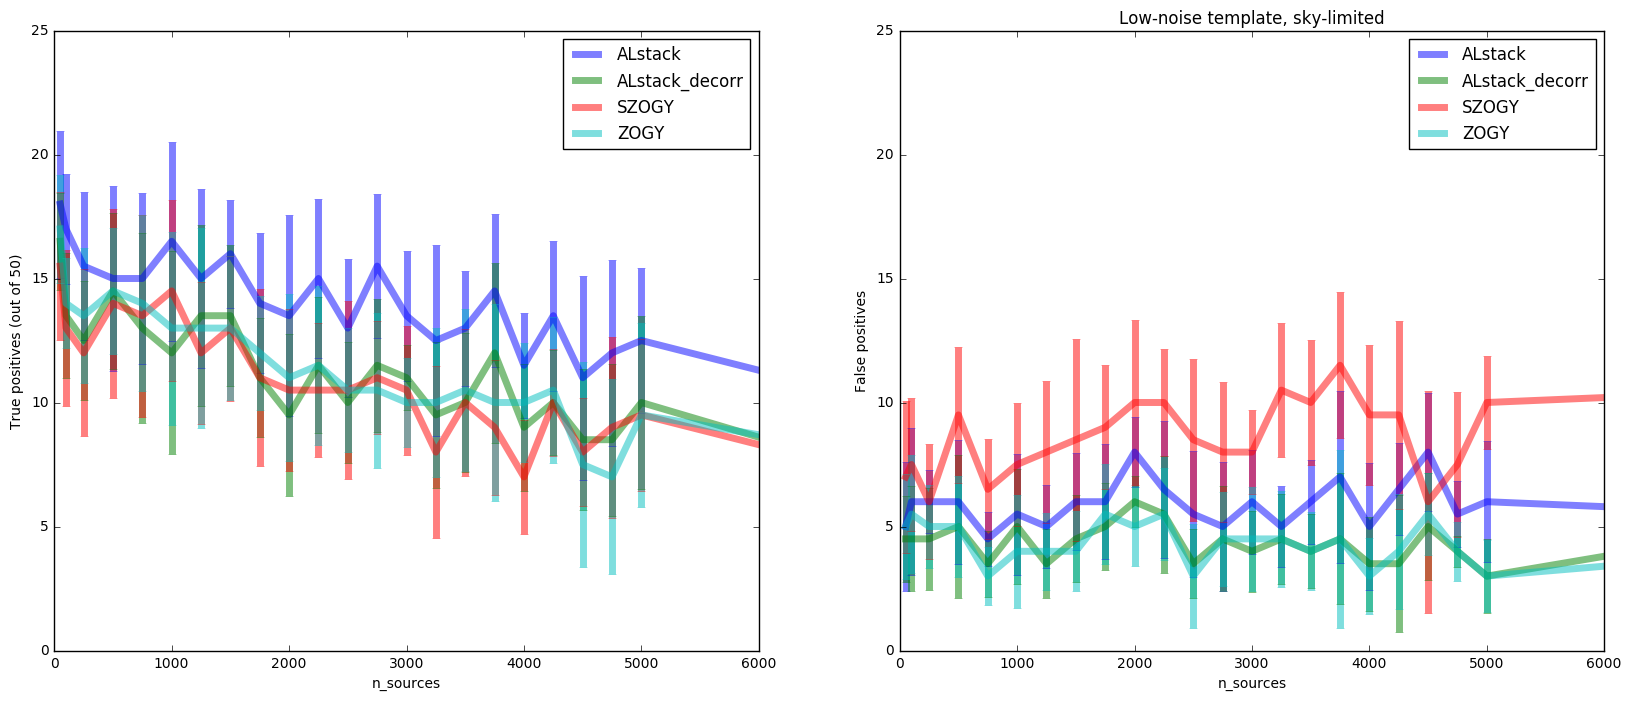

In [5]:
plt.subplots(1, 2, figsize=(20, 8))
ax = plt.subplot(121)
#TP1mn.drop('SZOGY', 1).reset_index().plot(x='n_sources', yerr=TP1err, alpha=0.5, lw=5, ax=ax)
TP1mn.reset_index().plot(x='n_sources', yerr=TP1err, alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('True positives (out of 50)')
ax.set_xlim(0, 6000)
ax.set_ylim(0, 25)
ax = plt.subplot(122)    
#FP1mn.drop('SZOGY', 1).reset_index().plot(x='n_sources', yerr=FP1err, alpha=0.5, lw=5, ax=ax)
FP1mn.reset_index().plot(x='n_sources', yerr=FP1err, alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('False positives')
ax.set_title('Low-noise template, sky-limited')
ax.set_xlim(0, 6000)
ax.set_ylim(0, 25);

Now do it after re-fitting the PSF in the science image

In [6]:
n_runs = 10
ns = np.append(np.insert(np.arange(500, 5001, 250), 0, [50, 100, 250]), [7500, 10000, 15000])
testResults2 = dit.multi.runMultiDiffimTests(varSourceFlux=620., 
                                             n_varSources=50, nStaticSources=ns,
                                             #templateNoNoise=True, skyLimited=True,
                                             sky=[30., 300.],
                                             avoidAllOverlaps=0.,
                                             n_runs=n_runs, remeasurePsfs=[True, True])

RUNNING: 250
CORES: 4

  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'

HERE1: 'NoneType' object has no attribute 'shape'

  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'

HERE1: 'NoneType' object has no attribute 'shape'

  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw:

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   50.0s



  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'

HERE1: 'NoneType' object has no attribute 'shape'

  File "src/PsfexPsf.cc", line 192, in virtual std::shared_ptr<afw::detection::Psf::Image> lsst::meas::extensions::psfex::PsfexPsf::_doComputeImage(const afw::geom::Point2D &, const afw::image::Color &, const afw::geom::Point2D &) const
    Only spatial variation (ndim == 2) is supported; saw 0 {0}
lsst::pex::exceptions::InvalidParameterError: 'Only spatial variation (ndim == 2) is supported; saw 0'

HERE2: 'NoneType' object has no attribute 'shape'


[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  7.2min


Weights sum to zero, can't be normalized


[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed: 22.8min


Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
Weights sum to zero, can't be normalized
ERROR RUNNING SEED: 67
ERROR RUNNING SEED: 68
ERROR RUNNING SEED: 72


[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 29.5min finished


In [9]:
dit.dumpObjects((testResults1, testResults2), "tmp5_pkl")

In [10]:
testResults1, testResults2 = dit.loadObjects('tmp5_pkl')

In [7]:
import pandas as pd
methods = ['ALstack', 'ZOGY', 'SZOGY', 'ALstack_decorr']

tr2 = [tr for tr in testResults2 if tr['result'] is not None]
print len(testResults2), len(tr2)

250 250


In [8]:
TP1 = []; FP1 = []; FN1 = []
for i, tr in enumerate(tr2):    
    rms1 = tr['psfInfo']['normedRms1']
    if rms1 is None:
        rms1 = np.nan
    rms2 = tr['psfInfo']['normedRms2']
    if rms2 is None:
        rms2 = np.nan

    TP = {key: tr['result'][key]['TP'] for key in methods}
    TP['n_sources'] = tr['n_sources']
    TP['normedRms1'] = rms1
    TP['normedRms2'] = rms2
    TP1.append(pd.DataFrame(TP, index=[0]))

    FN = {key: tr['result'][key]['FN'] for key in methods}
    FN['n_sources'] = tr['n_sources']
    FN1.append(pd.DataFrame(FN, index=[0]))

    FP = {key: tr['result'][key]['FP'] for key in methods}
    FP['n_sources'] = tr['n_sources']
    FP1.append(pd.DataFrame(FP, index=[0]))

FN1mn = pd.concat(FN1, axis=0).groupby('n_sources').median()
TP1mn = pd.concat(TP1, axis=0).groupby('n_sources').median()
FP1mn = pd.concat(FP1, axis=0).groupby('n_sources').median()

FN1err = pd.concat(FN1, axis=0).groupby('n_sources').std()
TP1err = pd.concat(TP1, axis=0).groupby('n_sources').std()
FP1err = pd.concat(FP1, axis=0).groupby('n_sources').std()
dit.sizeme(FN1mn.head())

,ALstack,ALstack_decorr,SZOGY,ZOGY
n_sources,,,,
50,32.0,33.5,36.5,34.0
100,33.5,36.5,38.0,33.5
250,34.5,37.5,39.5,37.0
500,35.0,36.0,38.5,36.0
750,35.0,37.5,40.0,37.0


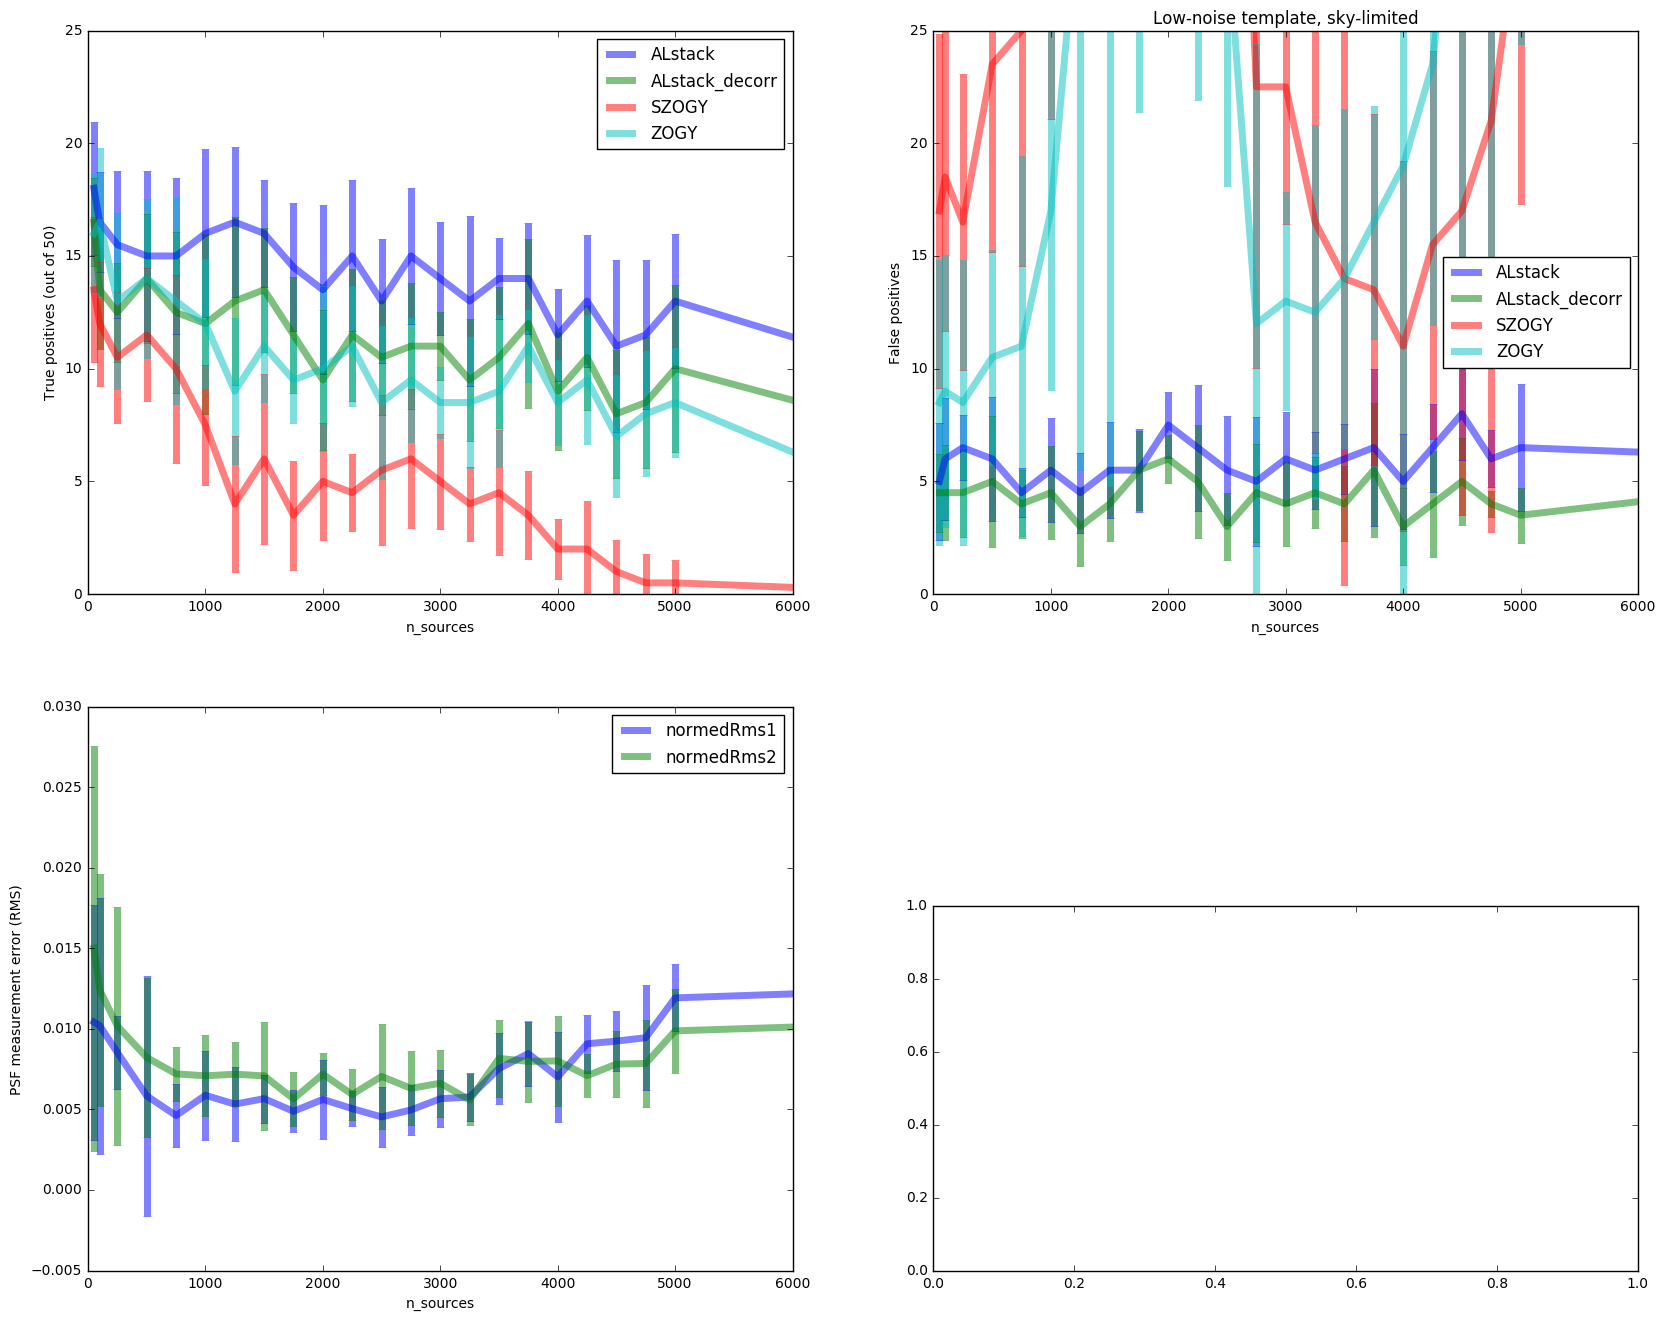

In [9]:
plt.subplots(3, 2, figsize=(20, 16))
ax = plt.subplot(221)    
TP1mn.drop(['normedRms1','normedRms2'], 1).reset_index().plot(x='n_sources', 
                                               yerr=TP1err.drop(['normedRms1','normedRms2'], 1), 
                                               alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('True positives (out of 50)')
ax.set_xlim(0, 6000)
ax.set_ylim(0, 25)
ax = plt.subplot(222)    
FP1mn.reset_index().plot(x='n_sources', yerr=FP1err, alpha=0.5, lw=5, ax=ax)
ax.set_ylabel('False positives')
ax.set_title('Low-noise template, sky-limited')
ax.set_xlim(0, 6000)
ax.set_ylim(0, 25)

ax = plt.subplot(223)    
TP1mn[['normedRms1', 'normedRms2']].reset_index().plot(x='n_sources', 
                                                       yerr=TP1err[['normedRms1', 'normedRms2']],
                                                       alpha=0.5, lw=5, ax=ax)
ax.set_xlim(0, 6000)
ax.set_ylabel('PSF measurement error (RMS)')

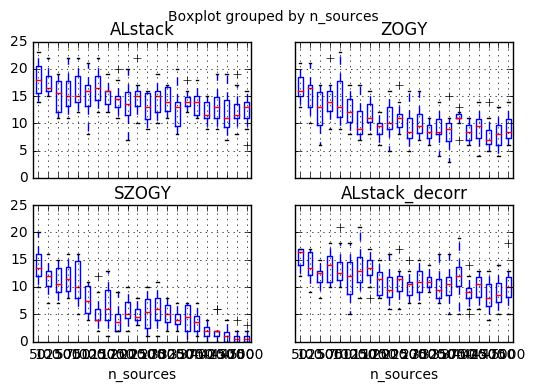

In [10]:
TP1a = pd.concat(TP1, axis=0).drop(['normedRms2'], 1)
TP1a = TP1a[TP1a.n_sources <= 6000]
TP1a.boxplot(column=methods, by='n_sources');

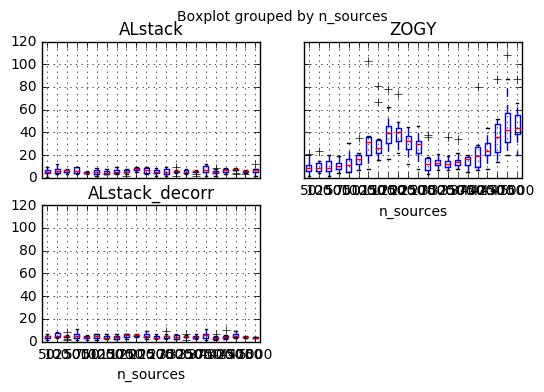

In [11]:
FP1a = pd.concat(FP1, axis=0).drop(['SZOGY'], 1)
FP1a = FP1a[FP1a.n_sources <= 6000]
FP1a.boxplot(column=['ALstack', 'ZOGY', 'ALstack_decorr'], by='n_sources');

I think violin plots will be more informative...

In [12]:
TP1a.head()

,ALstack,ALstack_decorr,SZOGY,ZOGY,n_sources,normedRms1
0,23,17,11,14,50,0.007500
0,15,14,13,16,50,NaN
0,15,17,16,20,50,0.016586
0,21,16,10,19,50,0.011773
0,21,17,20,16,50,0.025871


(0, 40)

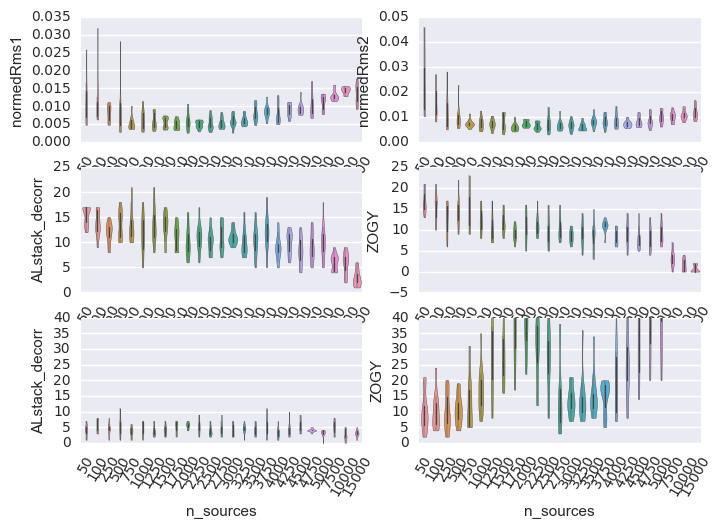

In [13]:
import seaborn as sns

TP1a = pd.concat(TP1, axis=0)
ax = plt.subplot(321)
g = sns.violinplot(x='n_sources', y='normedRms1', 
                   data=TP1a[['n_sources', 'normedRms1', 'normedRms2']], 
                   inner="box", cut=0, linewidth=0.3, bw=0.5, ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=60);
ax = plt.subplot(322)
g = sns.violinplot(x='n_sources', y='normedRms2', 
                   data=TP1a[['n_sources', 'normedRms1', 'normedRms2']], 
                   inner="box", cut=0, linewidth=0.3, bw=0.5, ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=60);

ax = plt.subplot(323)
g = sns.violinplot(x='n_sources', y='ALstack_decorr', 
                   data=TP1a[['n_sources', 'ALstack_decorr', 'ZOGY']], 
                   inner="box", cut=0, linewidth=0.3, bw=0.5, ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=60);
ax = plt.subplot(324)
g = sns.violinplot(x='n_sources', y='ZOGY', 
                   data=TP1a[['n_sources', 'ALstack_decorr', 'ZOGY']], 
                   inner="box", cut=0, linewidth=0.3, bw=0.5, ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=60);

FP1a = pd.concat(FP1, axis=0)
ax = plt.subplot(325)
g = sns.violinplot(x='n_sources', y='ALstack_decorr', 
                   data=FP1a[['n_sources', 'ALstack_decorr', 'ZOGY']], 
                   inner="box", cut=0, linewidth=0.3, bw=0.5, ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=60);
ax.set_ylim(0, 40)
ax = plt.subplot(326)
g = sns.violinplot(x='n_sources', y='ZOGY', 
                   data=FP1a[['n_sources', 'ALstack_decorr', 'ZOGY']], 
                   inner="box", cut=0, linewidth=0.3, bw=0.5, ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=60);
ax.set_ylim(0, 40)

OK, I think the reason that ZOGY is not doing as well in these tests as in the old tests ([here](https://github.com/djreiss/diffimTests/blob/master/notebooks/28.%20algorithm%20shootout%20-%20vs%20stellar%20density%20using%20measured%20PSFs.ipynb)) is that the PSF fitting is not doing as well (compare the above to cell #14 of that notebook).

Well... actually that's not true, or it is but we were measuring the WRONG PSFs in the tests in that notebook.